# **<font color="black">Описание проекта</font>**:</font>
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши.  
Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.  
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:  

• лог сервера с данными о посещениях сайта Яндекс.Афиши,  
• выгрузка всех заказов за этот период,  
• статистика рекламных расходов.  

# ***Вы изучите***:  

•	как люди пользуются продуктом,  
•	когда они начинают покупать,  
•	сколько денег приносит каждый клиент,  
•	когда клиент окупается. 

# **Описание данных**:  

Таблица visits (лог сервера с информацией о посещениях сайта):  

•	Uid — уникальный идентификатор пользователя,  
•	Device — категория устройства пользователя,  
•	Start Ts — дата и время начала сессии,  
•	End Ts — дата и время окончания сессии,  
•	Source Id — идентификатор рекламного источника, из которого пришел пользователь.  

Таблица orders (информация о заказах):  

•	Uid — уникальный id пользователя, который сделал заказ,  
•	Buy Ts — дата и время заказа,  
•	Revenue — выручка Яндекс.Афиши с этого заказа.  

Таблица costs (информация о затратах на маркетинг):  

•	source_id — идентификатор рекламного источника,  
•	dt — дата,  
•	costs — затраты на этот рекламный источник в этот день.

# **План работы над проектом**:  

# *Шаг 1. Загрузить данные и подготовите их к анализу*:  

 1.1. Загрузить данные о визитах, заказах и расходах в переменные,  
 1.2. Оптимизировать данные для анализа,  
 1.3. Убедится, что тип данных в каждой колонке — правильный. 
 
 Файлы:  
 
•	Посещения - датасет1.  
•	Заказы - датасет2.  
•	Расходы - датасет3.  

# *Шаг 2. Построить отчёты и посчитать метрики*:  

 2.1. Продукт:  

  2.1.1. Сколько людей пользуются в день, неделю, месяц?  
  2.1.2. Сколько сессий в день?  
  2.1.3. Сколько длится одна сессия?  
  2.1.4. Как часто люди возвращаются?  

 2.2. Продажи:  

  2.2.1. Когда люди начинают покупать?  
  2.2.2. Сколько раз покупают за период?  
  2.2.3. Какой средний чек?  
  2.2.4. Сколько денег приносят? (LTV)  

 2.3. Маркетинг:  

  2.3.1. Сколько денег потратили? Всего / на каждый источник / по времени?  
  2.3.2. Сколько стоило привлечение одного покупателя из каждого источника?  
  2.3.3. На сколько окупились расходы? (ROI)  
  
 # *3. Общий вывод*.

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None # для метода display()

import warnings
warnings.filterwarnings('ignore') # отключу предупреджения Pandas

1.1. Загрузим данные в переменные:

Продукт:

In [2]:
data_visits = pd.read_csv('датасет1')

Продажи:

In [3]:
data_orders = pd.read_csv('датсет2')

Маркетинг:

In [4]:
data_costs = pd.read_csv('датасет3')

Посмотрим на датафреймы глазами:

Датафрейм "Продукт"

In [5]:
display(data_visits.head(5))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
display(data_visits.tail(5))

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [7]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


5 столбцов, 359,4 тыс. строк.  
Пропусков нет.  
Перемеинуем столбцы - удалим пробелы в названиях, тк не все методы работают с пробелами в названиях.

In [8]:
data_visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

В датафрейме "Продукт" пропусков нет, обнаружился неверный тип данных в столбцах "Start Ts" и "End Ts", соответственно дата и время начала и окончания сессии.  

Преобразуем тип данных в дату и время:  

In [9]:
data_visits['start_ts'] = pd.to_datetime(data_visits['start_ts'], format= '%Y.%m.%d %H:%M:%S')

In [10]:
data_visits['end_ts'] = pd.to_datetime(data_visits['end_ts'], format= '%Y.%m.%d %H:%M:%S')

In [11]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Данные в датафрейме "Продукт" преобразованы.

Проверим датафрейм на предмет соблюдения последовательности событий - дата и время начала сессии должны быть раньше, чем дата и время окончания сессии.  

In [12]:
data_visits = data_visits.loc[(data_visits['start_ts'] < data_visits['end_ts'])]

Посмотрим на датафрейм:

In [13]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 359399
Data columns (total 5 columns):
device       323604 non-null object
end_ts       323604 non-null datetime64[ns]
source_id    323604 non-null int64
start_ts     323604 non-null datetime64[ns]
uid          323604 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 14.8+ MB


Оказалось, что в 35796 случаях, время окончания сессии оказалось болльше времени начала сесссии.  
Очевидный баг в данных, чуть менее 10% от первоначального датафрейма. Пришлось удалить.

Проверим методом describe()

In [14]:
data_visits.describe()

,source_id,uid
count,323604.000000,3.236040e+05
mean,3.732383,9.200880e+18
std,1.924782,5.295512e+18
min,1.000000,1.186350e+13
25%,3.000000,4.614964e+18
50%,4.000000,9.224491e+18
75%,4.000000,1.372109e+19
max,10.000000,1.844668e+19


Теперь данные похожи на правду.

Датафрейм "Продажи"

In [15]:
display(data_orders.head(5))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [16]:
display(data_orders.tail(5))

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [17]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


3 столбца, 50,4 тыс.строк, пропусков нет.  

Перемеинуем столбцы:

In [18]:
data_orders.columns = ['buy_ts', 'revenue', 'uid']

Ситуация аналогичная, неверный тип данных в столбце "Buy Ts" - дата и время заказа. Преобразуем:

In [19]:
data_orders['buy_ts'] = pd.to_datetime(data_orders['buy_ts'], format= '%Y.%m.%d %H:%M:%S')

In [20]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Тип данных преобразован.  
#Наблюдение - 323 тысяч посещений и только 50 тысяч заказов. То есть, только 15% посещений становятся заказами.

Датафрейм "Маркетинг"

In [21]:
display(data_costs.head(5))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [22]:
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


3 столбца, 2,5 тыс. строк. Пропусков нет.  

Преобразуем тип данных в столбце "dt"

In [23]:
data_costs['dt'] = pd.to_datetime(data_costs['dt'], format= '%Y.%m.%d %H:%M:%S')

In [24]:
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Промежуточные выводы**:  

В работе 3 датафрейма, пропусков нет, во всех оказался неверный тип данных даты, времени. Преобразовали.  

**2. Построим отчёты и посчитаем метрики**

**2.1. Датафрейм "Продукт"**

2.1.1. Количество посещений в день/неделю/месяц:

Посчитаем количесто уникальных пользователей, зашедших на сайт:

In [25]:
users_count = data_visits.groupby('start_ts').agg({'uid': 'nunique'})
print(users_count.sort_values(by = 'uid', ascending = False))

                     uid
start_ts                
2017-11-24 16:06:00   19
2017-11-24 17:19:00   15
2017-11-24 17:21:00   15
2018-05-31 10:01:00   15
2017-11-24 15:57:00   14
...                  ...
2017-11-11 17:06:00    1
2017-11-11 17:07:00    1
2017-11-11 17:08:00    1
2017-11-11 17:15:00    1
2017-12-16 09:32:00    1

[209770 rows x 1 columns]


Всего зашло на сайт 209,7 тыс. уникальных пользователей то есть, примерно 64% от общего количества. # Много новых пользователей, это хорошо.

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату:

In [26]:
data_visits['session_year']  = data_visits['start_ts'].dt.year
data_visits['session_month'] = data_visits['start_ts'].dt.month
data_visits['session_week']  = data_visits['start_ts'].dt.week
data_visits['session_date'] = data_visits['start_ts'].dt.date
pd.options.display.max_columns = None
display(data_visits.head(5))

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30


Посчитаем метрики. 
Сгруппируем данные по уникальным пользователям и найдем средние значения использования сайта по дням, неделям, месяцам:

In [27]:
dau_total = data_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = data_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = data_visits.groupby(['session_month']).agg({'uid': 'nunique'}).mean()

In [28]:
print('Среднее количество использования сайта в день:', int(dau_total))

Среднее количество использования сайта в день: 817


In [29]:
print('Среднее количество использования сайта в неделю:', int(wau_total))

Среднее количество использования сайта в неделю: 5148


In [30]:
print('Среднее количество использования сайта в месяц:', int(mau_total))

Среднее количество использования сайта в месяц: 20955


Посчитаем "метрики тщеславия":

In [31]:
print('Липкий фактор_неделя:', ((dau_total / wau_total)*100))

Липкий фактор_неделя: uid    15.880681
dtype: float64


In [32]:
print('Липкий фактор_месяц:', ((wau_total / mau_total)*100))

Липкий фактор_месяц: uid    24.567498
dtype: float64


Число пользователей растет от дня к недели и  от недели к месяцу.

Построим графики для показателей DAU/MAU/WAU, в разбивке по типу устройства и источнику:

Создадим сводные таблицы, для каждого показателя.

Показатель WAU по источникам трафика:

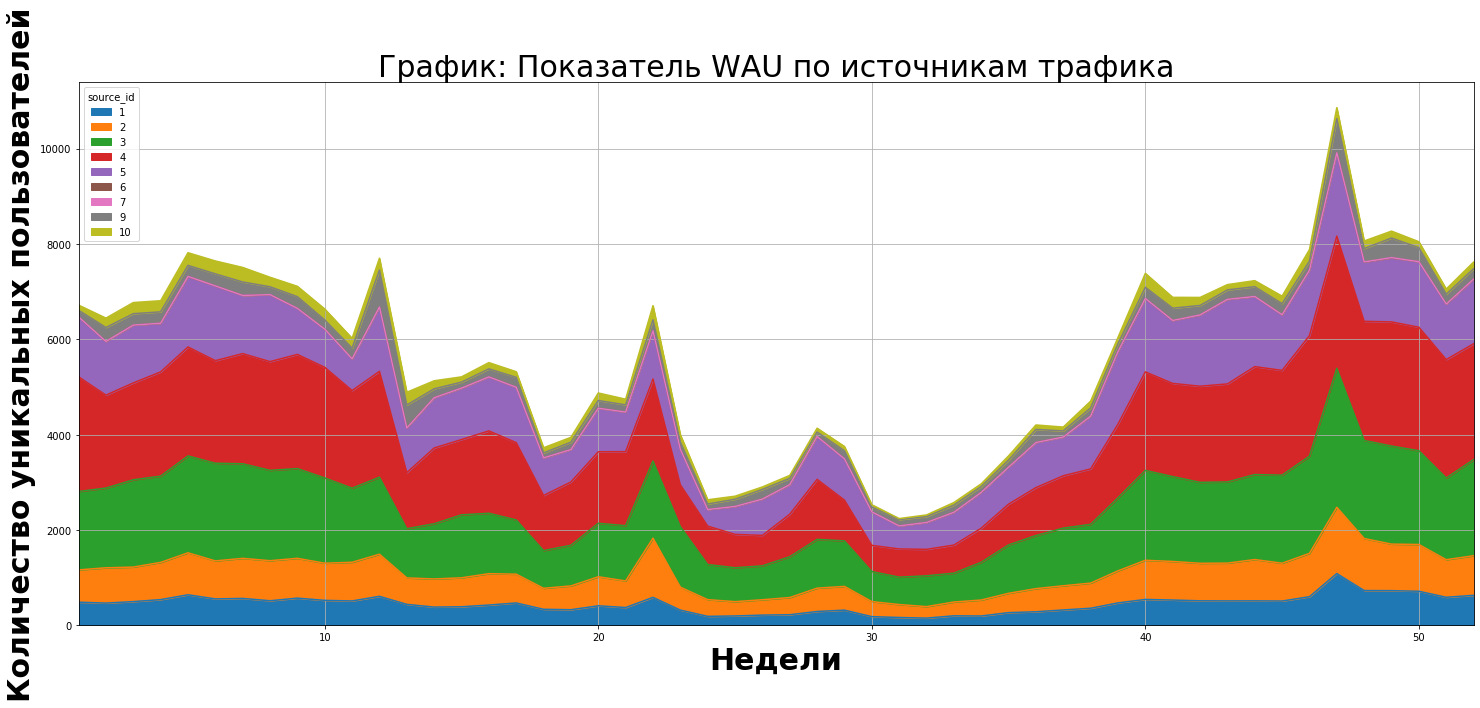

In [33]:
wau_total_source_id = data_visits.pivot_table(index='session_week', columns = 'source_id',  values='uid', aggfunc='nunique').plot(kind= 'area', figsize = (25,10), grid = True)
plt.xlabel('Недели', fontsize=30, fontweight="bold")
plt.ylabel('Количество уникальных пользователей', fontsize=30, fontweight="bold")
plt.title('График: Показатель WAU по источникам трафика', fontsize=30);
# показатель DAU не стал отрисовывать - практически польностью совпадает с WAU, а место занимает.

Показатель MAU по источникам трафика:

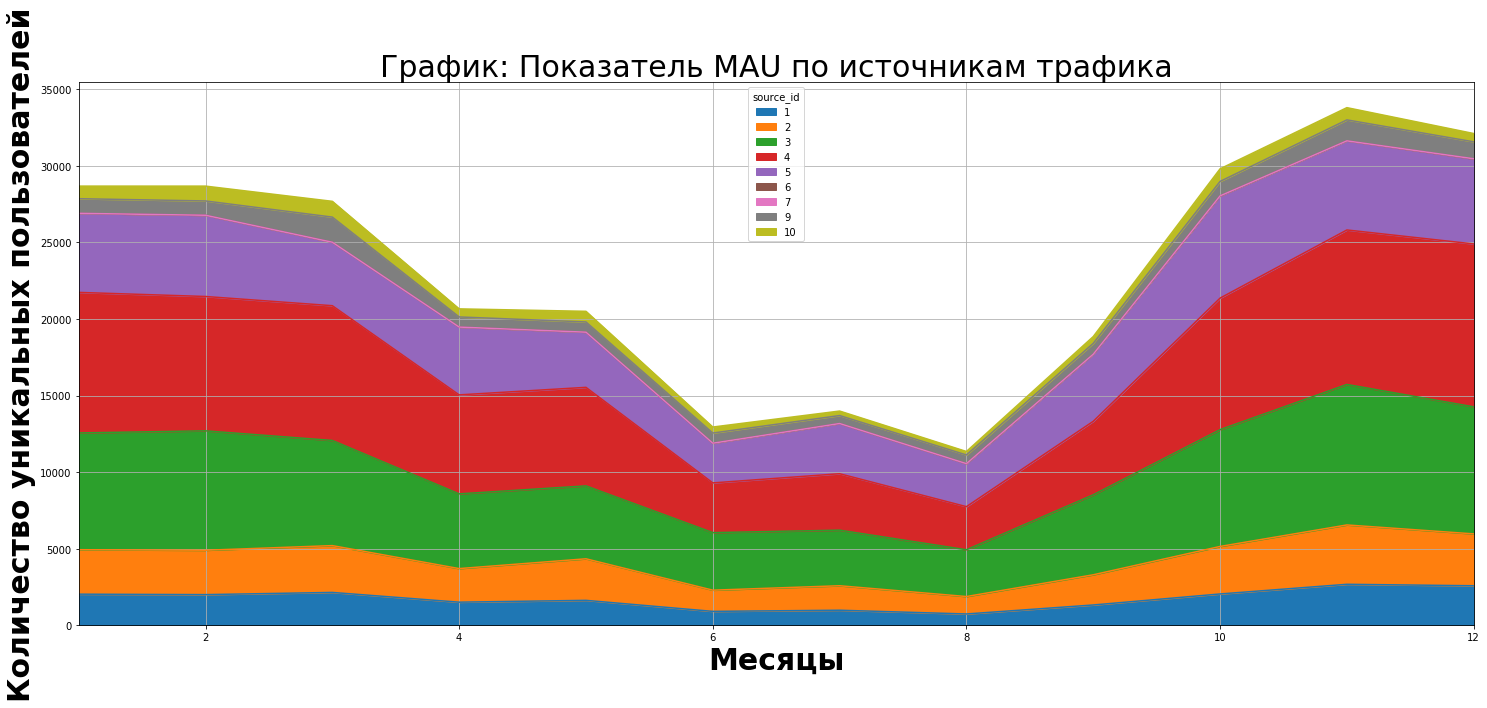

In [34]:
mau_total_source_id = data_visits.pivot_table(index='session_month', columns = 'source_id',  values='uid', aggfunc='nunique').plot(kind= 'area', figsize = (25,10), grid = True)
plt.xlabel('Месяцы', fontsize=30, fontweight="bold")
plt.ylabel('Количество уникальных пользователей', fontsize=30, fontweight="bold")
plt.title('График: Показатель MAU по источникам трафика', fontsize=30);

Показатель WAU по устройствам:

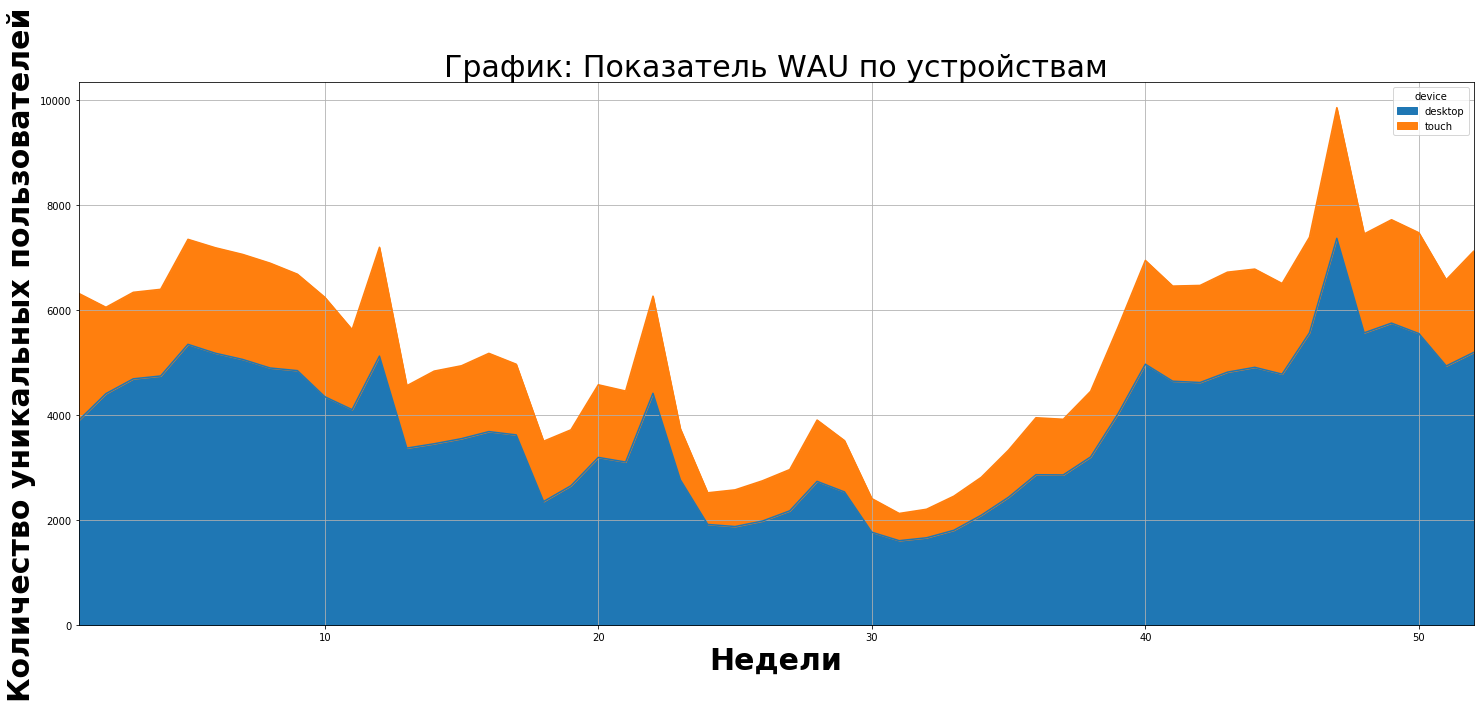

In [35]:
wau_total_device = data_visits.pivot_table(index='session_week', columns = 'device',  values='uid', aggfunc='nunique').plot(kind= 'area', figsize = (25,10), grid = True)
plt.xlabel('Недели', fontsize=30, fontweight="bold")
plt.ylabel('Количество уникальных пользователей', fontsize=30, fontweight="bold")
plt.title('График: Показатель WAU по устройствам', fontsize=30);

Показатель MAU по устройствам:

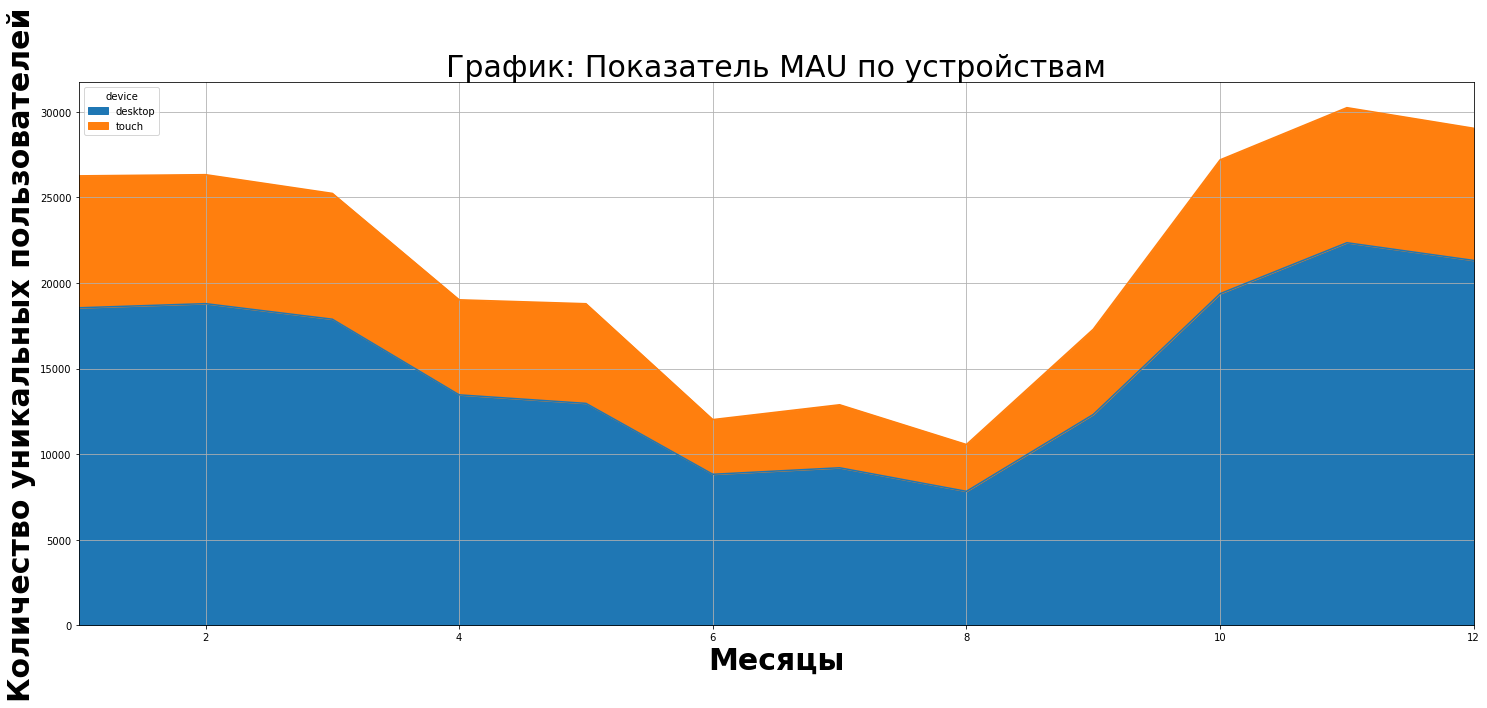

In [36]:
mau_total_device = data_visits.pivot_table(index='session_month', columns = 'device',  values='uid', aggfunc='nunique').plot(kind= 'area', figsize = (25,10), grid = True)
plt.xlabel('Месяцы', fontsize=30, fontweight="bold")
plt.ylabel('Количество уникальных пользователей', fontsize=30, fontweight="bold")
plt.title('График: Показатель MAU по устройствам', fontsize=30);

2.1.2. Количество сессий в день:

In [37]:
sessions_per_user = data_visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display(sessions_per_user)

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,599,547,1.095064
2017-06-02,596,549,1.085610
2017-06-03,429,400,1.072500
2017-06-04,447,416,1.074519
2017-06-05,807,738,1.093496
...,...,...,...
2018-05-27,582,537,1.083799
2018-05-28,1041,936,1.112179
2018-05-29,942,863,1.091541


В день один пользователь в среднем проводит на сайте 1 сессию. Для развлекательного контента - кино, театр, спортивные мероприятия, это хороший показатель.

2.1.3 Длительность одной сессии (показатель ASL):

In [38]:
data_visits['session_duration_sec'] = (data_visits['end_ts'] - data_visits['start_ts']).dt.seconds
print("Средняя продолжительность сессии:", data_visits['session_duration_sec'].mean().astype(int))

Средняя продолжительность сессии: 714


Средняя длительность одной сессии, почти, 12 минут. Скорее всего пользователь, не всегда ищет что-то конкретное, а думает как бы "сегодня" или в "выходные" провести время.  
А может быть не все так хорошо с навигацией. Надо сравнивать с конкурентами.

In [39]:
print("Медианная продолжительность сессии:", data_visits['session_duration_sec'].median().astype(int))

Медианная продолжительность сессии: 360


Медианная продолжительность сесси 6 минут, кто-то долго выбирает, а кто-то зашел и тут же вышел.

Построим гистограмму:

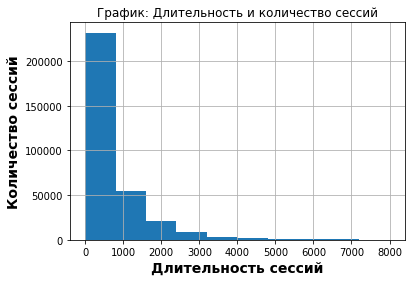

In [40]:
data_visits['session_duration_sec'].hist(bins=10, range=(0, 8000))
plt.xlabel('Длительность сессий', fontsize=14, fontweight="bold")
plt.ylabel('Количество сессий', fontsize=14, fontweight="bold")
plt.title('График: Длительность и количество сессий');

Посмотрим поближе:

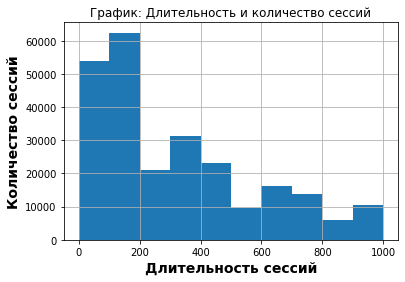

In [41]:
data_visits['session_duration_sec'].hist(bins=10, range=(0, 1000))
plt.xlabel('Длительность сессий', fontsize=14, fontweight="bold")
plt.ylabel('Количество сессий', fontsize=14, fontweight="bold")
plt.title('График: Длительность и количество сессий');

Чтобы посмотреть самое часто встречающиеся значение во множестве наблюдений, посмотрим моду:  

In [42]:
print("Мода продолжительность сессии:", data_visits['session_duration_sec'].mode().astype(int))

Мода продолжительность сессии: 0    60
dtype: int64


Мода составляет 60 секунд, то есть 1 минуту. ("0", это индекс).  
Если говорить точно - то самая часто встречающаяся длительность сессии - 1 минута - зашел, посмотрел, вышел.  

2.1.4 Показатель Retention Rate("Коэффициент удержания") - ответ на вопрос - "как часто люди возвращаются?"  

Определим даты, когда пользователь впервые зашел на сайт:

In [43]:
first_data_visits = data_visits.groupby(['uid'])['start_ts'].min()
print(first_data_visits.head(5))

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]


Перемеинуем столбец:

In [44]:
first_data_visits.name = 'first_activity_date'

Объединим таблицы методом join:

In [45]:
data_visits = data_visits.join(first_data_visits, on='uid')

Посмотрим на датафрейм:

In [46]:
display(data_visits.head(5))

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00


# Рассуждения:  
Как быстро бизнесу нужно принимать решения?  
Если бы у нас был условный онлайн-кинотеатр с сериалами, то мы бы смотрели понедельно (серии выходят раз в неделю, пользователи чаще всего использую сервис по выходным и т.д.).  
У нас же сервис по продаже билетов (театр, концерты). Вряд ли основной костяк наших пользователей будет посещать сервис и выбирать билеты еженедельно и уж тем более ежедневно?)  
Здесь разумнее будет разбить когорты по месяцам и смотреть возвращаются ли пользователи хотя бы раз в месяц.  

In [47]:
data_visits['first_activity_date_month'] = data_visits['first_activity_date'].astype('datetime64[M]')
data_visits['start_ts_month'] = data_visits['start_ts'].astype('datetime64[M]')
display(data_visits.head(5))

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_activity_date_month,start_ts_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01


Рассчитаем lifetime пользователя в рамках когорты, обратимся к константе np.timedelta64(1,'M'):

In [48]:
data_visits['cohort_lifetime'] = data_visits['start_ts_month'] - data_visits['first_activity_date_month']
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'] / np.timedelta64(1,'M')
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'].round().astype('int').astype('int')

Сгруппируем данные по когорте и lifetime.  
Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [49]:
cohorts = data_visits.groupby(['first_activity_date_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.  
Найдем исходное количество пользователей в когорте. Возьмем их число на нулевой месяц:  

In [50]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_date_month','uid']]
pd.options.display.max_columns = None
display(initial_users_count)

,first_activity_date_month,uid
0,2017-06-01,11885
12,2017-07-01,11825
23,2017-08-01,9214
33,2017-09-01,15125
42,2017-10-01,23538
50,2017-11-01,24852
57,2017-12-01,23030
63,2018-01-01,20573
68,2018-02-01,20173
72,2018-03-01,18793


Переименуем столбец uid в cohort_users методом rename().  
Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [51]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Объединим данные по когортам с исходным количеством пользователей в когорте:

In [52]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_date_month')

Рассчитаем Retention Rate.  
Разделим количество активных пользователей в каждый из месяц на исходное число пользователей в когорте:

In [53]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

Построим сводную таблицу и создадим тепловую карту:

In [54]:
retention_pivot = cohorts.pivot_table(index='first_activity_date_month',columns='cohort_lifetime',values='retention',aggfunc= 'sum')

In [55]:
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_date_month,,,,,,,,,,,,
2017-06-01,1.0,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07-01,1.0,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08-01,1.0,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09-01,1.0,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10-01,1.0,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078183,0.042733,0.037824,0.032593,0.021729,0.020602,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.054668,0.036518,0.030178,0.019453,0.017716,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.057794,0.037817,0.024352,0.019249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.056561,0.024290,0.019184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Поведение пользователей в когортах нестабильно - вначале растет, потом начинает снижаться. # Почему пользователю теряют интерес к сайту?

Для простроения тепловой карты, импортируем библиотеки seaborn:

In [56]:
import seaborn as sns
from matplotlib import pyplot as plt

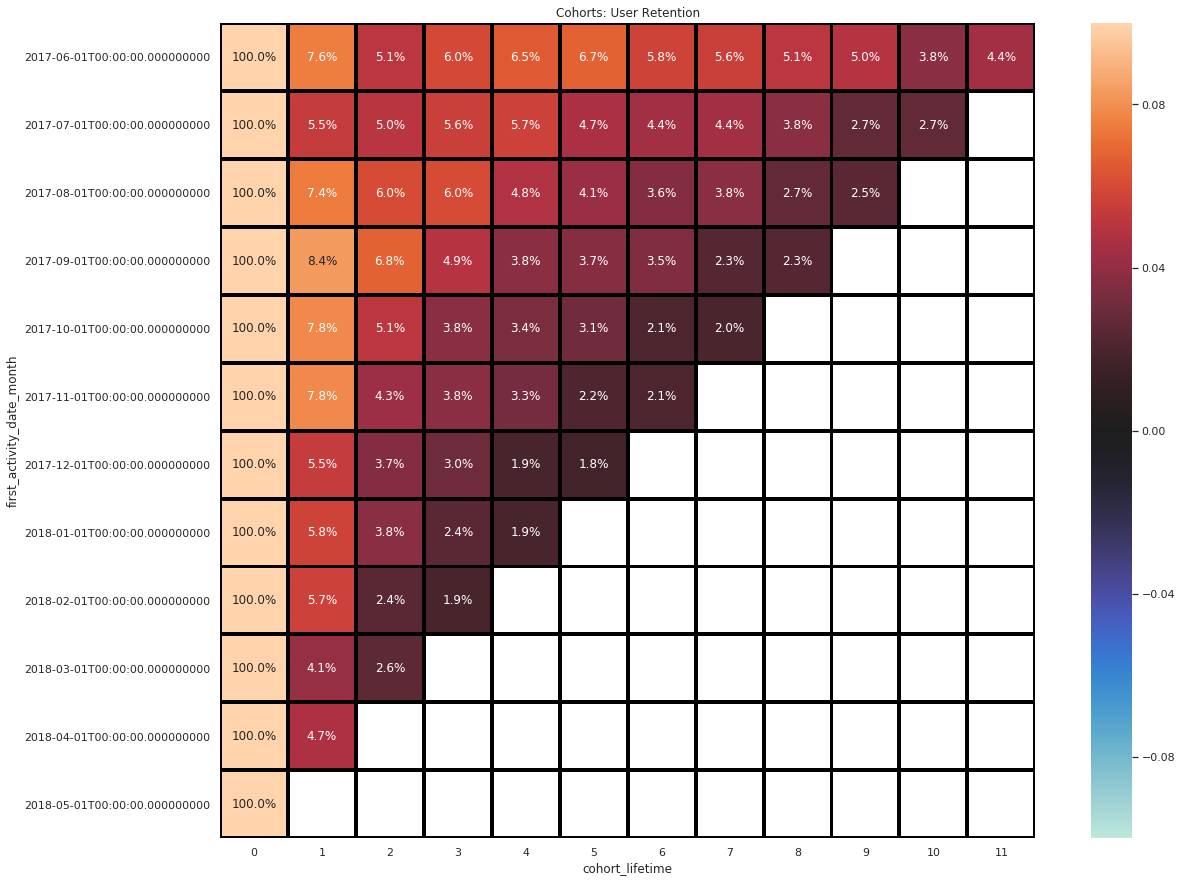

In [57]:
sns.set(style='white')
plt.figure(figsize=(20, 15))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%',
            linewidths=3, linecolor='black', vmin=-0.1, vmax=0.1, center= 0, square=True);

Как видно из сводной таблицы и тепловой карты, RR снижается. Это плохо. Интерес и лояльность пользователей не растет.  

***2.2. Датафрейм "Продажи"***

2.2.1. Начало покупок:

Будем работать с датафреймами data_visits и data_orders.  
Сгруппируем датафреймы по пользователям, чтобы найти дату их первого заказа и дату первой сессии:  

In [58]:
first_purchase_date = data_orders.groupby('uid')[['buy_ts']].min().reset_index()
first_purchase_date.columns = ['uid', 'first_purchase_date']
first_session_date = data_visits.groupby('uid')[['start_ts']].min().reset_index()
first_session_date.columns = ['uid', 'first_session']

Объединим датафреймы по столбцу 'uid':

In [59]:
when_they_buy = first_purchase_date.merge(first_session_date, on='uid')

In [60]:
display(when_they_buy)

,uid,first_purchase_date,first_session
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36076,18442290965339407211,2018-02-05 19:39:00,2018-02-05 19:35:00
36077,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
36078,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00
36079,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00


Добавим столбец с разницей в минутах между датой и временем первого заказа и датой и временем первой сессии:

In [61]:
when_they_buy['buy_diff'] = when_they_buy['first_purchase_date'] - when_they_buy['first_session']
when_they_buy['buy_diff'] = when_they_buy['buy_diff']/np.timedelta64(1, 'm')
when_they_buy['buy_diff'] = when_they_buy['buy_diff'].round(1)
display(when_they_buy.head(10))

,uid,first_purchase_date,first_session,buy_diff
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
5,3077748354309989,2018-03-03 12:33:00,2018-03-03 12:08:00,25.0
6,3605148382144603,2017-09-21 20:56:00,2017-08-15 21:54:00,53222.0
7,3753586865891862,2018-03-03 13:50:00,2018-03-03 13:47:00,3.0
8,4808417689019433,2018-01-09 23:32:00,2018-01-09 23:10:00,22.0
9,4992223027560440,2018-04-04 13:54:00,2018-04-04 13:54:00,0.0


Сгруппируем объединенный датафрейм по пользователям и по каждому из них выберем минимальную разницу по времени (т.е. разницу между первой сессией и первой покупкой):

In [62]:
to_hist = when_they_buy.groupby('uid')[['buy_diff']].min()

Построим гистограмму:

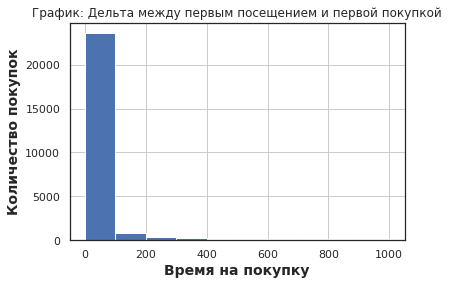

In [63]:
to_hist.hist(bins=10, range=(0, 1000))
plt.xlabel('Время на покупку', fontsize=14, fontweight="bold")
plt.ylabel('Количество покупок', fontsize=14, fontweight="bold")
plt.title('График: Дельта между первым посещением и первой покупкой');

Посмотрим поближе:

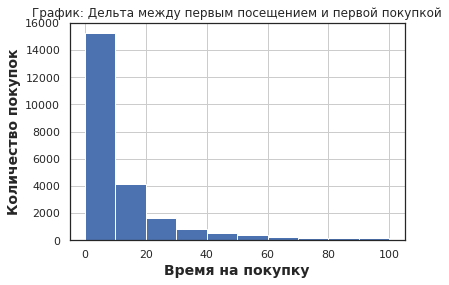

In [64]:
to_hist.hist(bins=10, range=(0, 100))
plt.xlabel('Время на покупку', fontsize=14, fontweight="bold")
plt.ylabel('Количество покупок', fontsize=14, fontweight="bold")
plt.title('График: Дельта между первым посещением и первой покупкой');

Подавлющее число покупок совершается в период от 0 до 10 минут.

Посмотрим еще ближе:

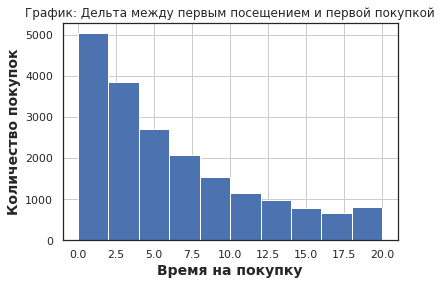

In [65]:
to_hist.hist(bins=10, range=(0, 20))
plt.xlabel('Время на покупку', fontsize=14, fontweight="bold")
plt.ylabel('Количество покупок', fontsize=14, fontweight="bold")
plt.title('График: Дельта между первым посещением и первой покупкой');

Посчитаем медианну:

In [66]:
to_hist.median()

buy_diff    15.0
dtype: float64

Пользователи начинают покупку, после, примерно, 15 минут после первого входа.  

2.2.2. Количество покупок за период

В качестве периода для анализа, будем рассматривать месяц. 
Посмотрим, сколько каждый пользователь делает покупок за "свой" месяц.

Сгруппируем по пользователям и найдем для каждого пользователя время первого заказа:

In [67]:
first_purchase = data_orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'date_of_first_purchase']
order_frequency = pd.merge(data_orders, first_purchase, on='uid')
display(order_frequency.head(10))

,buy_ts,revenue,uid,date_of_first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01 08:54:00
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01 09:22:00


Добавим столбец time_difference, где будет в месяцах указано время, прошедшее с момента первого визита на момент конкретного заказа:

In [68]:
def diff_month(row):
    date1 = row['buy_ts']
    date2 = row['date_of_first_purchase']
    return (date1.year - date2.year) * 12 + date1.month - date2.month

order_frequency['time_difference'] = order_frequency.apply(diff_month, axis=1)
order_frequency['date_of_first_purchase'] = order_frequency['date_of_first_purchase'].astype('datetime64[M]')
display(order_frequency.head(10))

,buy_ts,revenue,uid,date_of_first_purchase,time_difference
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,0
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,0
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,0
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,0


Выделим когорты по первому визиту и по месяцам, посчитаем количество заказов за данный конкретный месяц, количество уникальных пользователей и количество заказов на одного пользователя:

In [69]:
purchases_grouped_by_cohorts = (order_frequency.groupby(['date_of_first_purchase','time_difference']).agg({'buy_ts': 'count', 'uid': 'nunique'}))
purchases_grouped_by_cohorts['purchases_per_player'] = purchases_grouped_by_cohorts['buy_ts'] / purchases_grouped_by_cohorts['uid']
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()
display(purchases_grouped_by_cohorts.head(10))

,date_of_first_purchase,time_difference,buy_ts,uid,purchases_per_player
0,2017-06-01,0,2354,2023,1.163618
1,2017-06-01,1,177,61,2.901639
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,226,54,4.185185
4,2017-06-01,4,292,88,3.318182
5,2017-06-01,5,218,67,3.253731
6,2017-06-01,6,276,62,4.451613
7,2017-06-01,7,174,47,3.702128
8,2017-06-01,8,212,58,3.655172
9,2017-06-01,9,153,45,3.400000


Сгруппируем данные:

In [70]:
purchase_pivot = purchases_grouped_by_cohorts.pivot_table(index='date_of_first_purchase', columns='time_difference', values='purchases_per_player')

In [71]:
display(purchase_pivot)

time_difference,0,1,2,3,4,5,6,7,8,9,10,11
date_of_first_purchase,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07-01,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.881356,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Создадим тепловую карту количества покупок:

Выводы - первая когорта, самая лояльная, в среднем эта когорта делает более 3 заказов в месяц.  

Первый месяц все пользователи делают покупки около 2 раз за месяц.

Почему- то апрельская когорта во втором месяце использования сделала почти 3 покупки, при этом, остальные когорты, не делают, даже 2. Может рекламная компания была проведена?  

Получим месяц первой покупки каждого покупателя:

Создадим копию датафрейма data_orders:

In [72]:
data_orders_monthly = data_orders.copy()

Выделим месяцы из дат в датафрейме "Продажи"

In [73]:
data_orders_monthly['buy_ts']= data_orders_monthly['buy_ts'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя:

In [74]:
first_orders_month  =  data_orders_monthly.groupby('uid').agg({'buy_ts': 'min'}).reset_index() 
first_orders_month.columns  =  ['uid', 'first_purchase_date']

Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [75]:
cohort_sizes = first_orders_month.groupby('first_purchase_date').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_date', 'n_buyers']

Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [76]:
orders_first_orders_month = data_orders_monthly.merge(first_orders_month, on='uid')

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку:

In [77]:
cohorts = (orders_first_orders_month.groupby(['buy_ts', 'first_purchase_date']).agg({'revenue': 'sum', 'uid': 'count'}).reset_index())

Посчитаем средний чек:

In [78]:
mean_check = cohorts.merge(cohort_sizes, on='first_purchase_date')
time_diff = mean_check['buy_ts'] - mean_check['first_purchase_date']
mean_check['age'] = time_diff / np.timedelta64(1, 'M')
mean_check['age'] = mean_check['age'].round().astype('int')
mean_check['mean_check'] = mean_check['revenue']/mean_check['uid']

Построим сводную таблицу:

In [79]:
mean_check_pivot = mean_check.pivot_table(index="first_purchase_date", columns="age", values="mean_check")

In [80]:
display(mean_check_pivot)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07-01,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN,NaN
2017-09-01,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN,NaN,NaN
2017-10-01,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN,NaN,NaN,NaN
2017-11-01,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.687417,4.438482,6.454969,7.524844,2.711282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.706266,4.576486,3.453735,3.867143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Создам тепловую карту по среднему чеку:

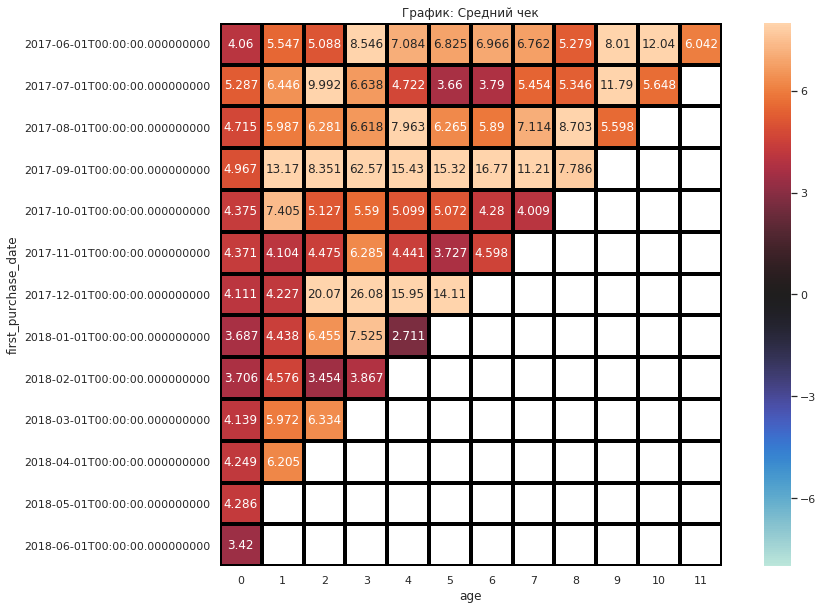

In [81]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('График: Средний чек')
sns.heatmap(mean_check_pivot, annot=True, fmt='.4', linewidths=3, linecolor='black', vmin=-8, vmax=8, center= 0, square=True);

Посчитаем медианну:

In [82]:
mean_check['mean_check'].mean()

7.648921983477595

Средний чек, для всего датафрейма около 8 тыс. руб.  
При этом выделяются декабрьская, сентябрьская и июльская когорты, по ним средний чек, в некоторые недели, существенно превышал средний чек для всего датафрейма.  
Пока, непонятно, почему. Может быть акции какие-то проводились?  

2.2.4. LTV (Life Time Value) - ответ на вопрос - "сколько денег приносят (клиенты)?"     

"*LTV — «пожизненная» ценность клиента — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок.   При расчёте LTV обычно обращаются к валовой прибыли с клиента за период"  

С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей.  
Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [83]:
LTV = cohorts.merge(cohort_sizes, on='first_purchase_date')

Объявим переменную:

In [84]:
margin_rate = 1

LTV считают из валовой прибыли.  
Значит, нужно найти валовую прибыль, умножив выручку на маржинальность.  
LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.  

In [85]:
LTV['gp'] = LTV['revenue'] * margin_rate
LTV['age'] = (LTV['buy_ts'] - LTV['first_purchase_date']) / np.timedelta64(1, 'M')
LTV['age'] = LTV['age'].round().astype('int')

Найдем LTV.  
Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте: 

In [86]:
LTV['ltv'] = LTV['gp'] / LTV['n_buyers']

Построим сводною таблицу:

In [87]:
LTV_pivot = LTV.pivot_table(index="first_purchase_date", columns="age", values="ltv", aggfunc='mean')

In [88]:
display(LTV_pivot)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Создадим тепловую карту по LTV:

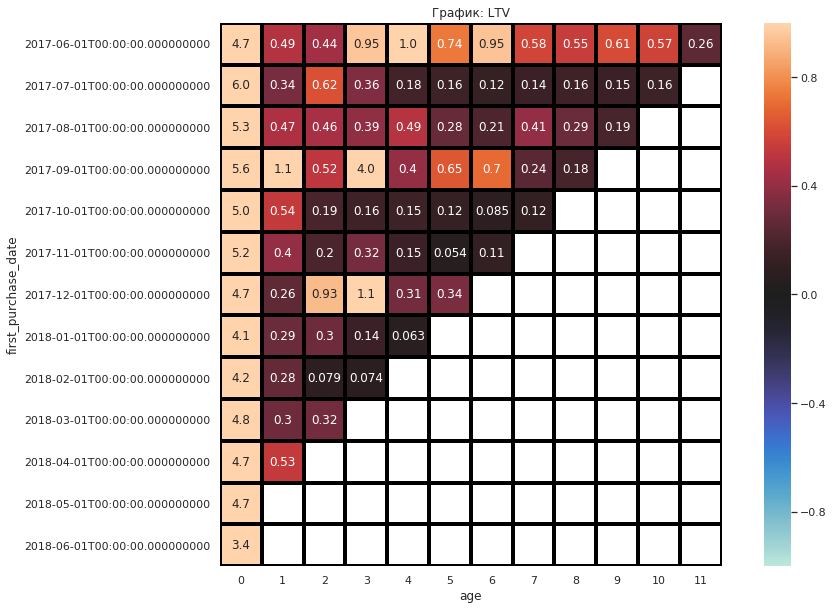

In [89]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('График: LTV')
sns.heatmap(LTV_pivot, annot=True, fmt='.2', linewidths=3, linecolor='black', vmin=-1, vmax=1, center= 0, square=True);

LTV первых когорт, ожидаемо выше, но интенсивно снижается.  

График LTV нарастающим итогом:

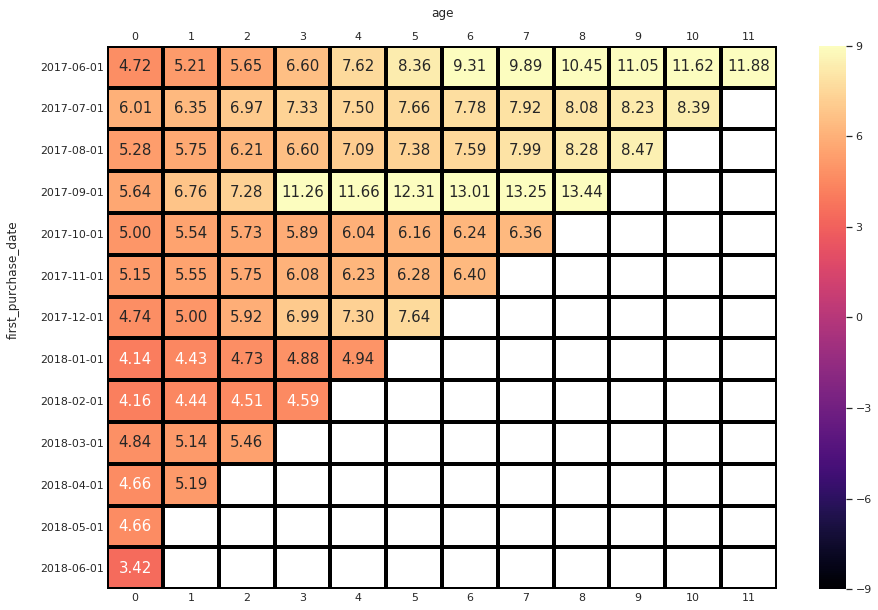

In [90]:
data_LTV_cumsum = LTV_pivot.cumsum(axis=1)
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(data_LTV_cumsum, annot= True, cmap= 'magma', fmt='.2f', vmin=-9, vmax=9, linewidths=3, linecolor = 'black', annot_kws={"size": '15'})
heatmap.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
heatmap.xaxis.set_label_position('top')
heatmap.xaxis.labelpad = 15
heatmap.yaxis.set_label_coords(-0.13, 0.57)
y_labels = heatmap.set_yticklabels(data_LTV_cumsum.index.date)
heatmap.tick_params(length=0)

Промежуточный вывод: 

Первая (июньская) когорта самая лояльная, стабильно показывает наибольший LTV по сравнению с другими когортами.  
При этом, очень странным выглядит всплеск LTV в сентябрьской когорте. Вероятно сочетание низкой рекламной активности (меньше затраты) и открытие театрального сезона.  

Посчитаем накопленный LTV за за 6 месяцев после первой покупки:

In [91]:
m6_cum_ltv = LTV_pivot.cumsum(axis=1).mean(axis=0)[5] 

In [92]:
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.969052630207336


***2.3. Датафрейм "Маркетинг"***

2.3.1. Расходы  

Посчитаем суммарные расходы на маркетинг:

In [93]:
data_costs_total = data_costs['costs'].sum()

In [94]:
print('На маркетинг, всего было израсходовано:', data_costs_total)

На маркетинг, всего было израсходовано: 329131.62


Выделим месяцы из дат в датафрейме с расходами:

Сгруппируем датафрейм и посчитаем суммарные расходы, помесячно:

In [95]:
data_costs['month'] = data_costs['dt'].astype('datetime64[M]')

In [96]:
costs_grouped = data_costs.groupby('month').agg({'costs': 'sum'})

In [97]:
print('Помесячные расходы составили:', costs_grouped)

Помесячные расходы составили:                costs
month               
2017-06-01  18015.00
2017-07-01  18240.59
2017-08-01  14790.54
2017-09-01  24368.91
2017-10-01  36322.88
2017-11-01  37907.88
2017-12-01  38315.35
2018-01-01  33518.52
2018-02-01  32723.03
2018-03-01  30415.27
2018-04-01  22289.38
2018-05-01  22224.27


Расходы начали расти, начиная с октября и до марта следующего года.  
Наибольшиме расходы на рекламу наблюдались в предверии Новогодних праздников.  

Посчитаем расходы на каждый источник.

Построим сводную таблицу:

In [98]:
data_costs_source = data_costs.groupby('source_id').agg({'costs': 'sum'})

In [99]:
print(data_costs_source)

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


3 источник трафика оказался самым дорогим. Вероятно, телевизионная реклама.

Построим график, используя сводную таблицу:

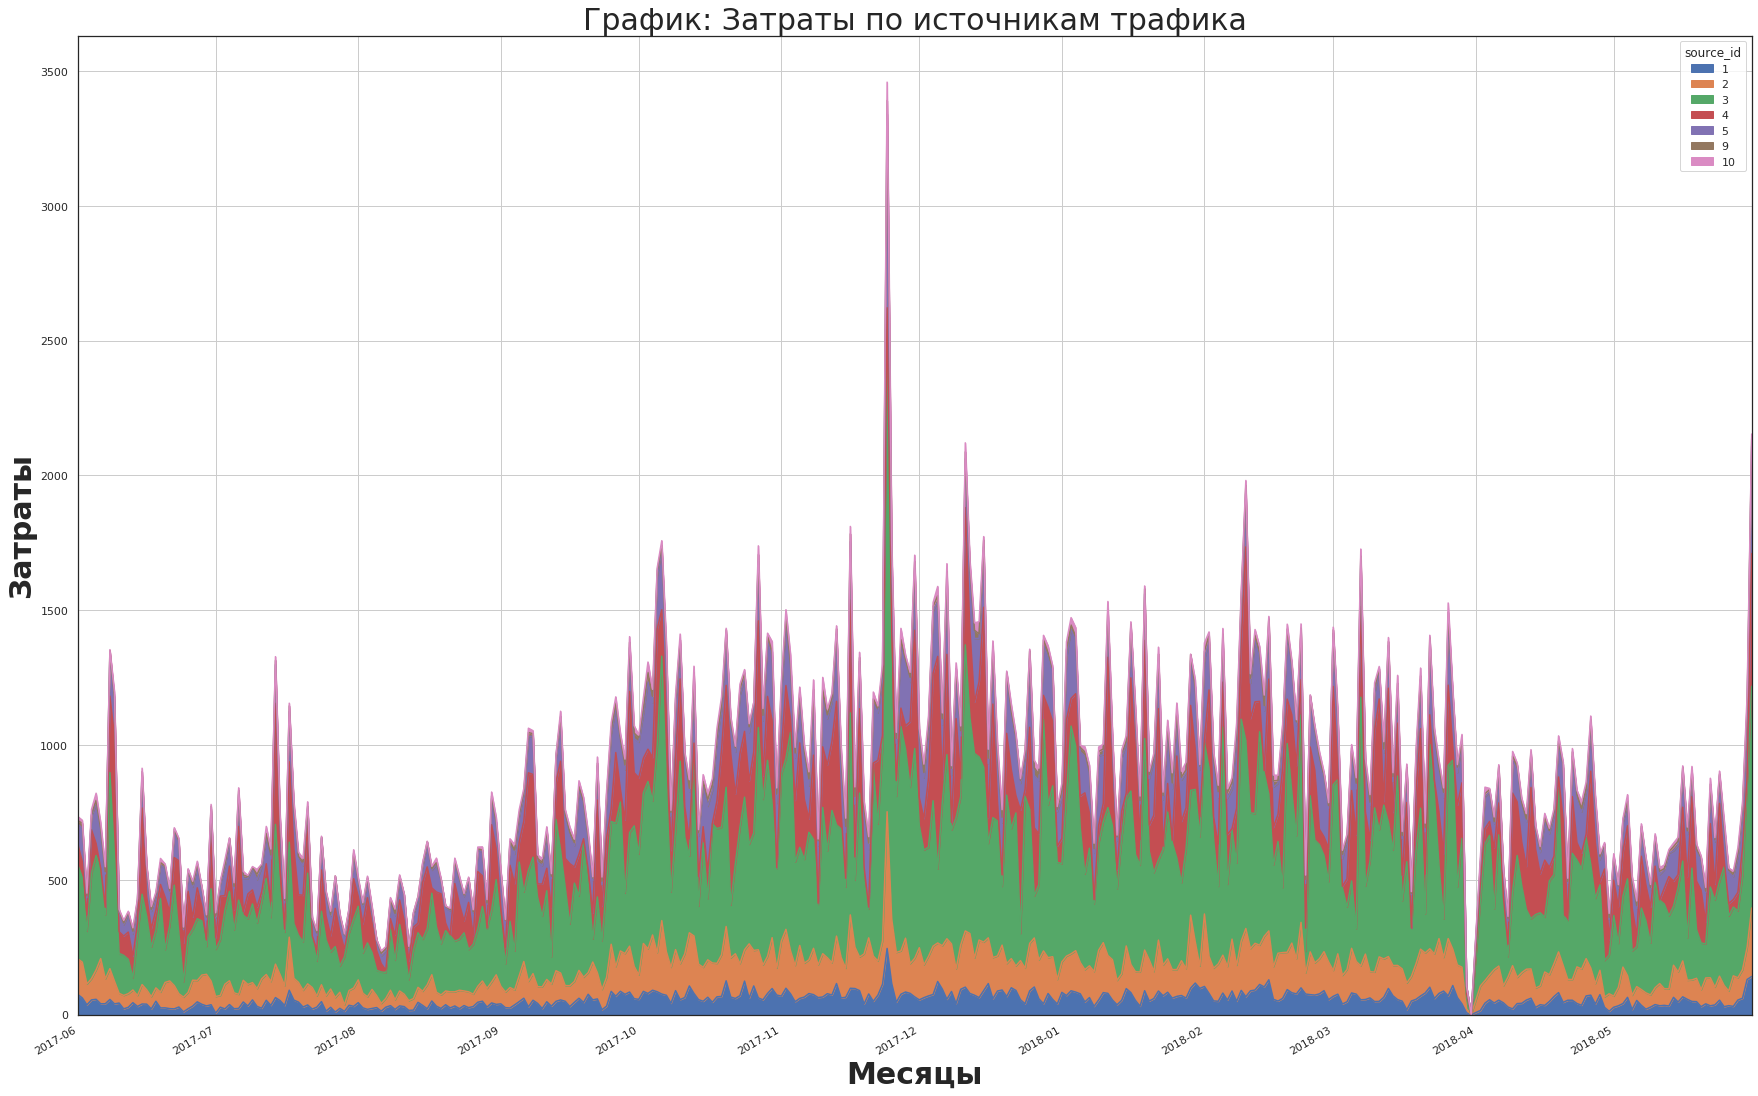

In [100]:
costs_pivot = data_costs.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum').plot(kind= 'area', figsize = (30,20), grid = True)
plt.xlabel('Месяцы', fontsize=30, fontweight="bold")
plt.ylabel('Затраты', fontsize=30, fontweight="bold")
plt.title('График: Затраты по источникам трафика', fontsize=30);

Зеленый (3-ий) источник трафика, как бы съедает весь бюджет.  
При этом наблюдается интересный выброс у красного (4-го) источника трафика в декабре 2017 года. Интересно, что это было?

2.3.2. Стоимость привлечения одного покупателя.   
"То есть следует найти показатель CAC для каждого источника трафика."  

Посмотрим на таблицу с заказами:

In [101]:
data_orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

Посмотрим на таблицу с расходами:

In [102]:
data_costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

ТОП заказов и ТОП рекламных расходово не совпадают. ТОП рекламных расходов пришлись на начало марта 2018 года, а ТОП заказов на май 2018.  
При этом даты первых заказов и даты расходов совпадают, также, практически совпадают последние даты заказов и расходов. Что обусловлено, скорее всего, особенностями формирования датафреймов.

In [103]:
monthly_costs = data_costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()

In [104]:
print(monthly_costs)

        month  source_id    costs
0  2017-06-01          1  1125.61
1  2017-06-01          2  2427.38
2  2017-06-01          3  7731.65
3  2017-06-01          4  3514.80
4  2017-06-01          5  2616.12
..        ...        ...      ...
79 2018-05-01          3  9411.42
80 2018-05-01          4  4214.21
81 2018-05-01          5  3669.56
82 2018-05-01          9   362.17
83 2018-05-01         10   409.86

[84 rows x 3 columns]


In [105]:
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_date')
report_new = pd.merge(report, monthly_costs, left_on='first_purchase_date', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [106]:
display(report_new)

,first_purchase_date,n_buyers,buy_ts,revenue,uid,month,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,1,1125.61,0.556406
1,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,2,2427.38,1.199891
2,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,3,7731.65,3.821873
3,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,4,3514.80,1.737420
4,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,5,2616.12,1.293188
...,...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,3,9411.42,3.149739
542,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,4,4214.21,1.410378
543,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,5,3669.56,1.228099
544,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,9,362.17,0.121208


Посмотрим на графике:

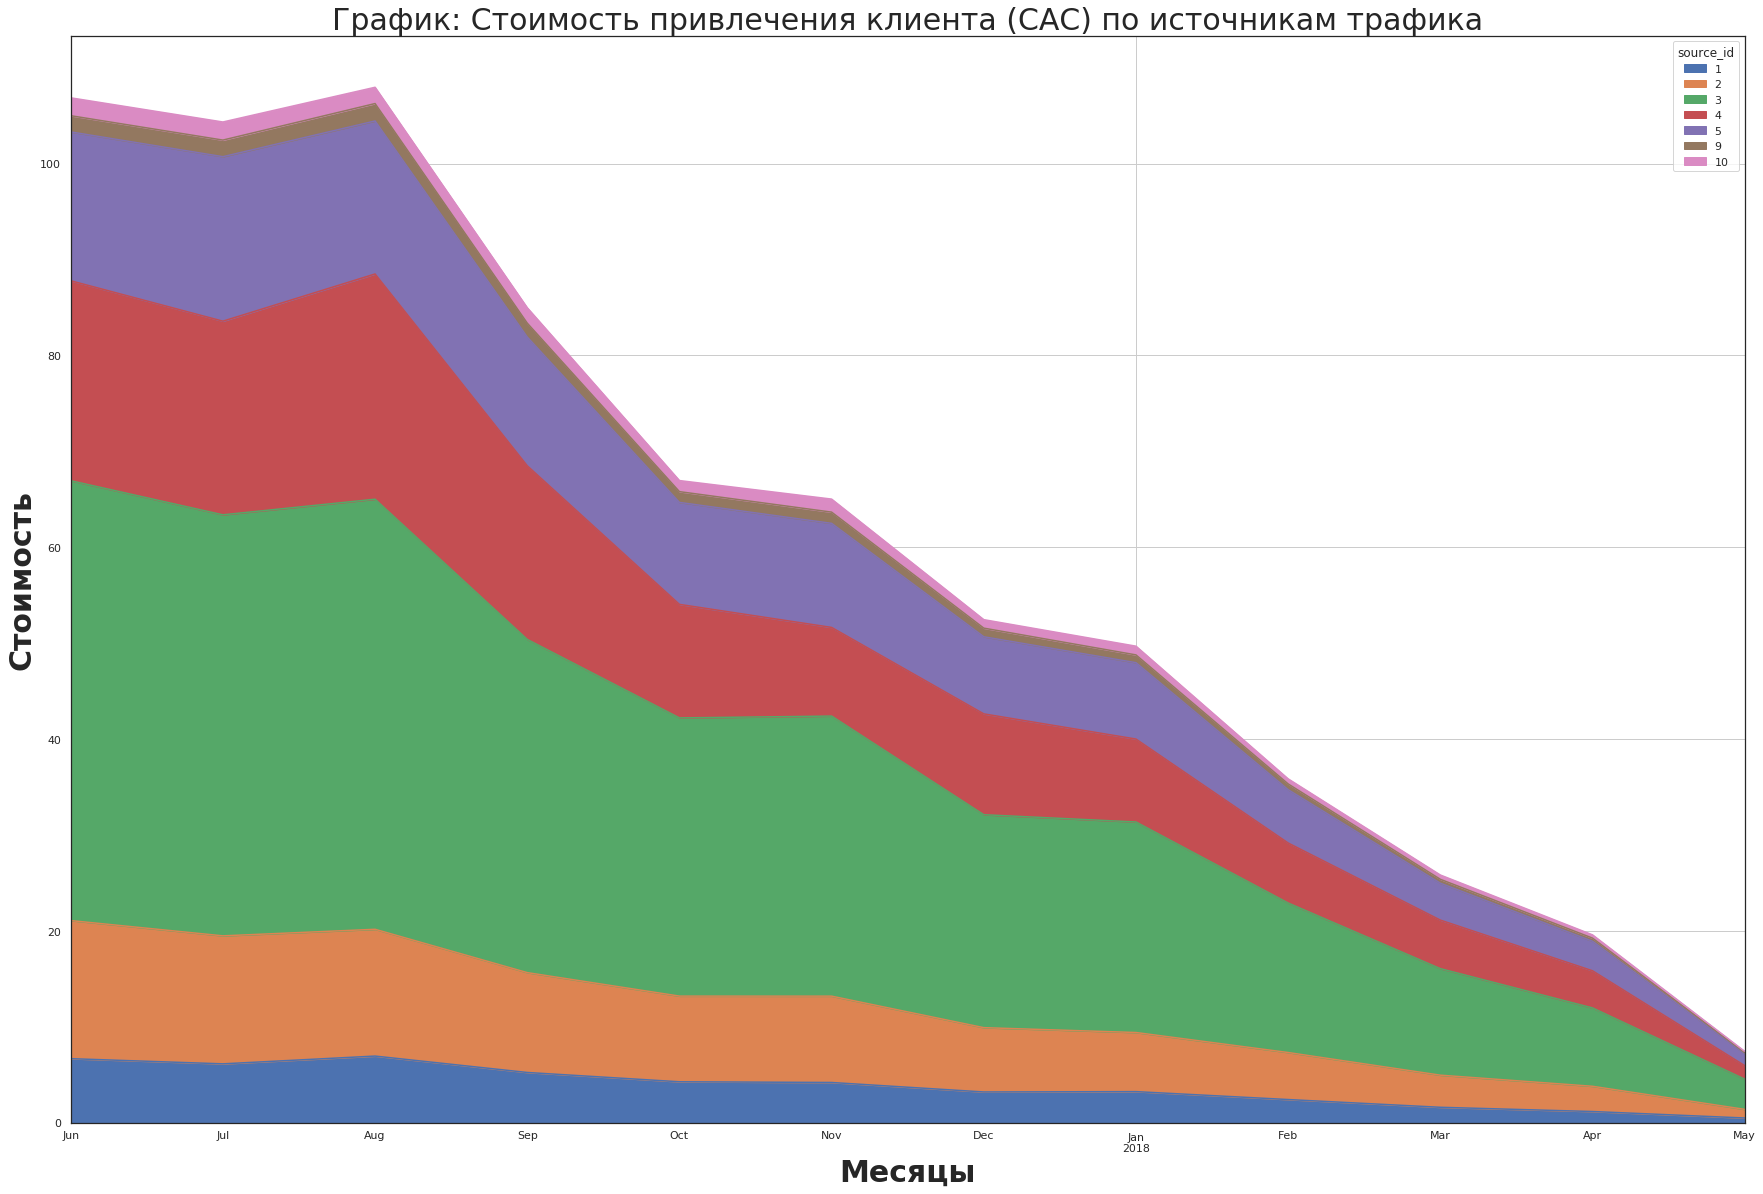

In [107]:
report_new_pivot = report_new.pivot_table(index='month', columns='source_id', values='cac', aggfunc='sum').plot(kind= 'area', figsize = (30,20), grid = True)
plt.xlabel('Месяцы', fontsize=30, fontweight="bold")
plt.ylabel('Стоимость', fontsize=30, fontweight="bold")
plt.title('График: Стоимость привлечения клиента (CAC) по источникам трафика', fontsize=30);

3-ий, 4-ый и 5-ый источники трафика самые затратные, с этим надо что-то делать.  

Рассчитаем показатель ROMI  
"Возврат на маркетинговые инвестици"

In [108]:
report_new['romi'] = LTV['ltv'] / report_new['cac']
output = report_new.pivot_table(index='month', columns='source_id', values='romi', aggfunc='mean').fillna('')

In [109]:
display(report_new)

,first_purchase_date,n_buyers,buy_ts,revenue,uid,month,source_id,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,1,1125.61,0.556406,8.490943
1,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,2,2427.38,1.199891,0.404477
2,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,3,7731.65,3.821873,0.114509
3,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,4,3514.80,1.737420,0.549476
4,2017-06-01,2023,2017-06-01,9557.49,2354,2017-06-01,5,2616.12,1.293188,0.790705
...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,3,9411.42,3.149739,NaN
542,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,4,4214.21,1.410378,NaN
543,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,5,3669.56,1.228099,NaN
544,2018-05-01,2988,2018-05-01,13925.76,3249,2018-05-01,9,362.17,0.121208,NaN


In [110]:
print(report_new['romi'].max())

42.62909978568685


In [111]:
print(report_new['romi'].min())

0.04625780359507825


Сгруппирую данные по источникам трафика:

In [112]:
romi_source_id = report_new.groupby(['source_id']).agg({'romi': 'mean'}).fillna('').reset_index()

In [113]:
display(romi_source_id)

,source_id,romi
0,1,3.143685
1,2,1.386041
2,3,0.316275
3,4,0.252136
4,5,0.328132
5,9,14.548165
6,10,2.650851


Посмотрим на графике:

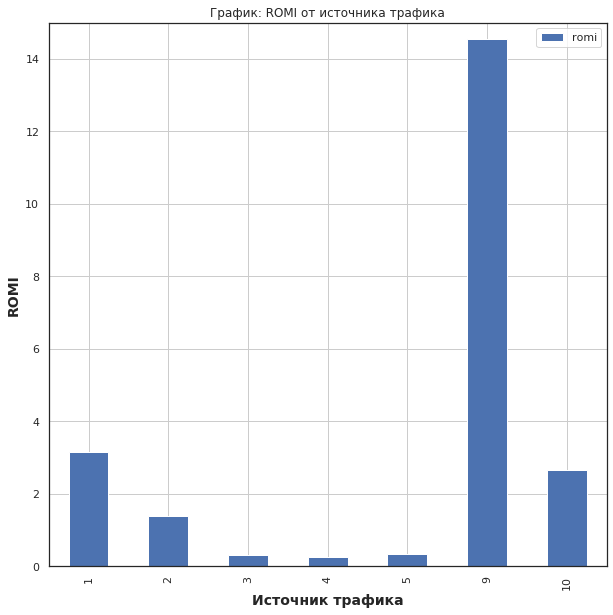

In [114]:
romi_source_id.plot(kind='bar', x='source_id', y='romi', ylim=(0, 15), grid=True, figsize = (10, 10))
plt.xlabel('Источник трафика', fontsize=14, fontweight="bold")
plt.ylabel('ROMI', fontsize=14, fontweight="bold")
plt.title('График: ROMI от источника трафика');

Как видно из таблицы, источники трафика 3, 4, 5 не окупаются.  
Самым эффективным источником оказался 9.  

Маркетинговые инвестиции не окупаются.  

##**Общий вывод:**##  

  В работу пришли 3 датафрейма, содержащие данные о посещениях сайта Яндекс.Афиша, продажах билетов на сайте, а также маретинговых затратах.  
  Данные качественные, поменяли, только, формат дат.
  
  Были рассчитаны показатели:
  
  - Количество пользователей сайта,  
  - Сколько раз пользователи заходят на сайт в день,  
  - Сколько по времени проводят на сайте,
  - Насколько сайт популярен у пользователей.
  - Через какое время пользователи принимают решение о покупке,  
  - Как часто покупают,  
  - Средний чек пользователя,  
  - Сколько денег приносят пользователи,  
  - Затраты на продвижение,
  - Стоимость привлечения покупателей,  
  - Окупаемость маркетинговых затрат.
  
  Выводы:
  
  За анализируемый период наблюдается рост количестова новых посителей на сайте Яндекс.Афиша, расчеты метрик показали, что "липкий фактор" месяца составялет 24.6,  "липкий фактор" недели 15.8, то есть сайт пользуется популярностью и интерес пользователей растет, вероятно сказывается мощь бренда, высокая рекламная активность.  

  При этом, показатель RR (коэффициент удержания), весьма низок, впрочем все относительно - надо сравнивать с конкурентами/лучшимии практиками рынка.  
  
  Большинство пользователей не задерживаются на сайте больше 1 минуты, при этом время, среднее время на покупку составляет 15 минут. Значит большинство пользователей заходят на сайт, что-то бегло смотрят и уходят. Большая часть клиентов после первой покупки уже не возвращаются. Оставшиеся же совершают в среднем 2 покупки в месяц. Лояльность пользователей низкая.
  
  При этом, первая когорта пользователей, проявляет, относительно высокий и постоянный интерес к сайту.
Нужно более глубоко исследовать саму эту когорту, а также первый этап запуска сайта - так сказать, вернуться к истокам.
Возможно, следует сделать опрос пользователей из других когорт - что понравилось, что не понравилось, что бы хотели видеть на сайте.

  Необходимо пересмотреть рекламную активность.
Как показал анализ - 3, 4 и 5 каналов привлечения - не окупаются, хотя оттуда и приходят пользователи.  
По другим каналам, следует провести углубленное исследование, особое внимание, уделив 9, 10 и 1 каналу привлечения.

  Как показал анализ - большинство пользователей заходит на сайт со стационарных устройств, что выглядит очень странным, учитывая, наш век мобильной электроники. Возможная причина в том, что приложение работает, только на Айфон. Отсюда (https://zen.yandex.ru/media/map_mind/kakuiu-os-ispolzuiut-v-mire-android-ili-ios-5d4aa1d20ce57b00adfbf081) известно, что в РФ 23% пользователей IOS и 73% пользователей Android. Вероятно здесь скрыт мощный ресурс для наращивания аудитории.

  В текущем виде, бизнес убыточен. 
  
  Рекомендации:  
  
  Нужна новая маркетинговая стратегия. Вернуться на начальный этап - весьма успешный, проанализировать действия конкурентов, сделать мобильное приложение на Андроид.